In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [2]:
from mlrose_hiive import RHCRunner

In [3]:
# # Generate a new 8-Queen problem using a fixed seed.
# problem = QueensGenerator().generate(seed=123456, size=8)

# # create a runner class and solve the problem
# sa = SARunner(problem=problem,FEvals=True,
#               experiment_name='queens8_sa',
#               output_directory=None, # note: specify an output directory to have results saved to disk
#               seed=123456,
#               iteration_list=2 ** np.arange(11),
#               max_attempts=500,
#               temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
#               decay_list=[mlrose_hiive.GeomDecay])

# # the two data frames will contain the results
# df_run_stats, df_run_curves = sa.run()

In [4]:
# df_run_stats.columns

In [5]:
# HTML(df_run_stats[['Iteration', 'Fitness',  'Time', 'State']][0:12].to_html())


In [6]:
# state_sample = df_run_stats[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
# HTML(state_sample.to_html())


# Kevin Boyer 1:54 AM
# So it's not "how few colors can you use" but rather, with a given number of colors, and a network of (partially) connected nodes, how close to an ideal state can you get, with an idea state being no adjacent nodes have the same color (edit

In [3]:
# Generate a new Max K problem using a fixed seed.
problem = MaxKColorGenerator().generate(seed=123456, number_of_nodes=25, max_connections_per_node=3, max_colors=3)

In [8]:
# nx.draw(problem.source_graph,
#         pos=nx.spring_layout(problem.source_graph, seed = 3))

In [4]:
# GARunner(fe)
import time

In [5]:
ga = GARunner(problem=problem,
#               FEvals=True,
              experiment_name='max_k25_ga',maximize=True,
              output_directory="Results", # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
                population_sizes=[10, 20, 50,100,150,200,300],
              mutation_rates=np.arange(0,0.4,0.015))

# the two data frames will contain the results

start = time.time()
df_run_stats_ga, df_run_curves_ga = ga.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




Runtime of the program is 2209.052379131317


In [11]:
df_run_stats_ga.columns

Index(['Iteration', 'Fitness', 'Time', 'State', 'Population Size',
       'Mutation Rate', 'max_iters', 'maximize', 'FEvals'],
      dtype='object')

In [12]:
HTML(df_run_stats_ga[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:1].to_html())


,Iteration,Fitness,FEvals,Time,State
0,0,24.0,10,0.001027,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0]"


In [13]:
state_sample_ga = df_run_stats_ga[['Population Size', 'Mutation Rate']][:1]
HTML(state_sample_ga.to_html())

,Population Size,Mutation Rate
0,10,0.0


In [14]:
best_fitness_ga = df_run_curves_ga['Fitness'].max()
best_runs_ga = df_run_curves_ga[df_run_curves_ga['Fitness'] == best_fitness_ga]

HTML(best_runs_ga.to_html())

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters,maximize,FEvals
0,0,0.001027,24.0,10,0.000,1024,True,10
507,0,0.001027,24.0,10,0.015,1024,True,10
1099,0,0.001027,24.0,10,0.030,1024,True,10
2124,0,0.001027,24.0,10,0.045,1024,True,10
3056,0,0.001027,24.0,10,0.060,1024,True,10
3812,0,0.001027,24.0,10,0.075,1024,True,10
4473,0,0.001027,24.0,10,0.090,1024,True,10
5364,0,0.001027,24.0,10,0.105,1024,True,10
6389,0,0.001027,24.0,10,0.120,1024,True,10
7378,0,0.001027,24.0,10,0.135,1024,True,10


This gives us nine candidates for the best run. We are going to pick the one with that reached the best fitness value in the fewest number of evaluations.

(We could also have chosen to use Iterations as our criteria.)



In [15]:

minimum_evaluations = best_runs_ga['FEvals'].min()

best_curve_run = best_runs_ga[best_runs_ga['FEvals'] == minimum_evaluations]

In [16]:
HTML(best_curve_run.to_html())


,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters,maximize,FEvals
0,0,0.001027,24.0,10,0.000,1024,True,10
507,0,0.001027,24.0,10,0.015,1024,True,10
1099,0,0.001027,24.0,10,0.030,1024,True,10
2124,0,0.001027,24.0,10,0.045,1024,True,10
3056,0,0.001027,24.0,10,0.060,1024,True,10
3812,0,0.001027,24.0,10,0.075,1024,True,10
4473,0,0.001027,24.0,10,0.090,1024,True,10
5364,0,0.001027,24.0,10,0.105,1024,True,10
6389,0,0.001027,24.0,10,0.120,1024,True,10
7378,0,0.001027,24.0,10,0.135,1024,True,10


In [17]:
best_mr = best_curve_run['Mutation Rate'].iloc()[0]
best_pop_size = best_curve_run['Population Size'].iloc()[0]
print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')


Best Mutation Rate: 0.0, best Population Size: 10


In [18]:
run_stats_best_run = df_run_stats_ga[(df_run_stats_ga['Mutation Rate'] == best_mr) & (df_run_stats_ga['Population Size'] == best_pop_size)]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time']].to_html())

,Iteration,Fitness,FEvals,Time
0,0,24.0,10,0.001027
1,1,11.0,22,0.006363
2,2,10.0,34,0.010810
3,4,9.0,57,0.016442
4,8,7.0,103,0.024578
5,16,7.0,191,0.037880
6,32,7.0,367,0.062499
7,64,7.0,719,0.106658
8,128,7.0,1423,0.191033
9,256,7.0,2831,0.359970


In [19]:
best_state = run_stats_best_run[['State']][:1]
HTML(best_state.to_html())

,State
0,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0]"


In [20]:
print([n for n in problem.source_graph.nodes])

[0, 7, 17, 1, 14, 19, 2, 12, 21, 3, 16, 4, 5, 6, 9, 18, 8, 10, 24, 13, 11, 23, 15, 20, 22]


In [8]:
color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(ordered_state)


NameError: name 'run_stats_best_run' is not defined

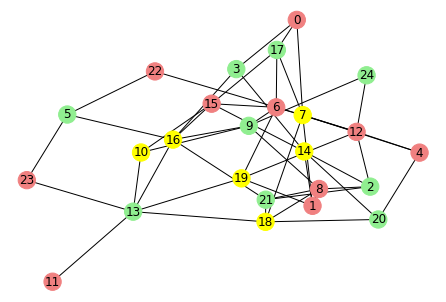

In [22]:
colors = ['lightcoral', 'lightgreen', 'yellow']
node_color_map = [colors[s] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3),
        with_labels=True,
        node_color=node_color_map)

In [23]:
# best_state, best_fitness, fitness_curve, fitness_evals = mlrose_hiive.simulated_annealing(problem,max_attempts=10, max_iters=1000, init_state=[0]
#                                                                                           , random_state=1, curve=True, fevals=True)

In [12]:
sa = SARunner(problem=problem,
              experiment_name='max_k25_sa',maximize=True,
#               output_directory=None
              output_directory="Results", # note: specify an output directory to have results saved to disk
              seed=123456,
              iteration_list=2 ** np.arange(11),
              max_attempts=1000,
              temperature_list=[0.1,1.0,100 ,1000,100000,10000,1000000,10000000,100000000],
              decay_list=[mlrose_hiive.GeomDecay])

# the two data frames will contain the results


In [13]:
start = time.time()
df_run_stats_sa, df_run_curves_sa = sa.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")



TypeError: 'NoneType' object is not iterable

In [25]:
df_run_stats_sa.columns

Index(['Iteration', 'Fitness', 'Time', 'State', 'schedule_type',
       'schedule_init_temp', 'schedule_decay', 'schedule_min_temp',
       'schedule_current_value', 'Temperature', 'max_iters', 'maximize',
       'FEvals'],
      dtype='object')

In [26]:
# sa.best_state

In [27]:
HTML(df_run_stats_sa[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:1].to_html())




,Iteration,Fitness,FEvals,Time,State
0,0,24.0,0,0.000325,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0]"


In [28]:
state_sample_sa = df_run_stats_sa[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
HTML(state_sample_sa.to_html())


,schedule_current_value,schedule_init_temp,schedule_min_temp
0,0.1,0.1,0.001


In [29]:
# state_sample_sa = df_run_stats_sa[['Population Size', 'Mutation Rate']][:1]
# HTML(state_sample_sa.to_html())

best_fitness_sa = df_run_curves_sa['Fitness'].max()
best_runs_sa = df_run_curves_sa[df_run_curves_sa['Fitness'] == best_fitness_sa]

HTML(best_runs_sa.to_html())


minimum_evaluations = best_runs_sa['FEvals'].min()

best_curve_run = best_runs_sa[best_runs_sa['FEvals'] == minimum_evaluations]

HTML(best_curve_run.to_html())


,Iteration,Time,Fitness,Temperature,max_iters,maximize,FEvals
2583,241,0.100627,30.0,1000,1024,True,512
3608,241,0.100627,30.0,100000,1024,True,512
4633,241,0.100627,30.0,10000,1024,True,512
5658,241,0.100627,30.0,1000000,1024,True,512
6683,241,0.100627,30.0,10000000,1024,True,512
7708,241,0.100627,30.0,100000000,1024,True,512


In [30]:

best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp

print(f'Best initial temperature: {best_init_temperature}')

Best initial temperature: 1000


In [31]:

run_stats_best_run = df_run_stats_sa[df_run_stats_sa['schedule_init_temp'] == best_init_temperature]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].to_html())

,Iteration,Fitness,FEvals,Time,State
36,0,24.0,0,0.000172,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0]"
37,1,23.0,2,0.007582,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0]"
38,2,20.0,4,0.014861,"[1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0]"
39,4,20.0,8,0.022354,"[1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0]"
40,8,10.0,16,0.030018,"[2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0]"
41,16,13.0,32,0.038426,"[2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0]"
42,32,14.0,64,0.047983,"[2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0]"
43,64,15.0,128,0.059946,"[1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0]"
44,128,17.0,256,0.076451,"[2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2]"
45,256,21.0,512,0.102642,"[1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1]"


In [32]:
best_state = run_stats_best_run[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
HTML(best_state.to_html())

,schedule_current_value,schedule_init_temp,schedule_min_temp
36,999.998267,1000.0,0.001


[0, 7, 17, 1, 14, 19, 2, 12, 21, 3, 16, 4, 5, 6, 9, 18, 8, 10, 24, 13, 11, 23, 15, 20, 22]
[0, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2]


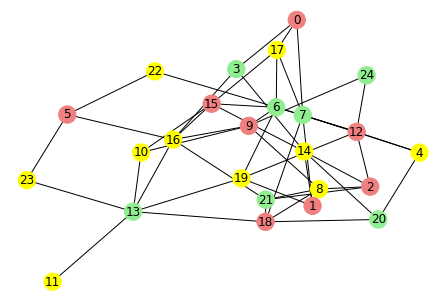

In [33]:

print([n for n in problem.source_graph.nodes])

color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
print(ordered_state)


colors = ['lightcoral', 'lightgreen', 'yellow']
node_color_map = [colors[s] for s in ordered_state]

nx.draw(problem.source_graph,
        pos=nx.spring_layout(problem.source_graph, seed = 3),
        with_labels=True,
        node_color=node_color_map)

# RHC

In [5]:
rhc = RHCRunner(problem=problem,
                       experiment_name="maxk25_RHC",maximize=True,
#                        output_directory="/Users/matthieudivet/Desktop/GaTech/Classes/ML/Assignments/Randomized_optimization/knapsack_problem",
                                output_directory="Results",
                seed=123456,
                       iteration_list=2 ** np.arange(11),
                       max_attempts=1000,
                          restart_list=[0,1,10,100,50,75])

start = time.time()
# df_run_stats_ga, df_run_curves_ga = ga.run()
# df_run_stats_sa, df_run_curves_sa = sa.run()
# rhc_run_stats, rhc_run_curves = rhc.run()
# mimic_run_stats, mimic_run_curves = mimic.run()
rhc_run_stats, rhc_run_curves = rhc.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")







Runtime of the program is 237.0406014919281


In [35]:
df_run_stats_ga.columns

Index(['Iteration', 'Fitness', 'Time', 'State', 'Population Size',
       'Mutation Rate', 'max_iters', 'maximize', 'FEvals'],
      dtype='object')

In [36]:
rhc_run_stats.columns

Index(['Iteration', 'Fitness', 'Time', 'State', 'Restarts', 'max_iters',
       'maximize', 'current_restart', 'FEvals'],
      dtype='object')

In [37]:


HTML(rhc_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']][0:1].to_html())




state_sample_sa = rhc_run_stats[['Restarts','current_restart']][:1]
HTML(state_sample_sa.to_html())

,Restarts,current_restart
0,0,0


In [38]:
best_fitness_sa = rhc_run_curves['Fitness'].max()
best_runs_sa = rhc_run_curves[rhc_run_curves['Fitness'] == best_fitness_sa]

HTML(best_runs_sa.to_html())

,Iteration,Time,Fitness,Restarts,max_iters,maximize,current_restart,FEvals
0,0,0.00032,24.0,0,1024,True,0,0
1025,0,0.00032,24.0,1,1024,True,0,0
3074,0,0.00032,24.0,10,1024,True,0,0
14339,0,0.00032,24.0,100,1024,True,0,0
29030,0,0.00032,24.0,50,1024,True,0,0
43721,0,0.00032,24.0,75,1024,True,0,0
58412,0,0.00032,24.0,200,1024,True,0,0
73103,0,0.00032,24.0,250,1024,True,0,0
87794,0,0.00032,24.0,300,1024,True,0,0
102485,0,0.00032,24.0,400,1024,True,0,0


In [39]:



# # state_sample_sa = rhc_run_stats[['Population Size', 'Mutation Rate']][:1]
# # HTML(state_sample_sa.to_html())




# minimum_evaluations = best_runs_sa['FEvals'].min()

# best_curve_run = best_runs_sa[best_runs_sa['FEvals'] == minimum_evaluations]

# HTML(best_curve_run.to_html())



# best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp

# print(f'Best initial temperature: {best_init_temperature}')


# run_stats_best_run = rhc_run_stats[rhc_run_stats['schedule_init_temp'] == best_init_temperature]
# HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].to_html())

# best_state = run_stats_best_run[['schedule_current_value', 'schedule_init_temp', 'schedule_min_temp']][:1]
# HTML(best_state.to_html())


# print([n for n in problem.source_graph.nodes])

# color_indexes = literal_eval(run_stats_best_run['State'].tail(1).values[0])
# ordered_state = [color_indexes[n] for n in problem.source_graph.nodes]
# print(ordered_state)


# colors = ['lightcoral', 'lightgreen', 'yellow']
# node_color_map = [colors[s] for s in ordered_state]

# nx.draw(problem.source_graph,
#         pos=nx.spring_layout(problem.source_graph, seed = 3),
#         with_labels=True,
#         node_color=node_color_map)

# MIMIC

In [6]:
from mlrose_hiive import MIMICRunner

In [10]:
# del mimic

In [7]:
mimic = MIMICRunner(problem=problem,
                           experiment_name="maxk25_MIMIC",
#                            output_directory="/Users/matthieudivet/Desktop/GaTech/Classes/ML/Assignments/Randomized_optimization/knapsack_problem",
                    output_directory="Results",       
                    seed=123456,
                           iteration_list=2 ** np.arange(11),
                           population_sizes=[10,20,30,40,50,70,100,150,200],
                           max_attempts=500,
                           keep_percent_list=[0.2,0.3],
                           use_fast_mimic=True)

start = time.time()
# df_run_stats_ga, df_run_curves_ga = ga.run()
# df_run_stats_sa, df_run_curves_sa = sa.run()
# rhc_run_stats, rhc_run_curves = rhc.run()
# mimic_run_stats, mimic_run_curves = mimic.run()
# rhc_run_stats, rhc_run_curves = rhc.run()
mimic_run_stats, mimic_run_curves = mimic.run()
# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")







Runtime of the program is 176.3891613483429
